In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
nltk.download('stopwords')
data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data_cleaned = data[['v1', 'v2']].rename(columns={'v1': 'Label', 'v2': 'EmailText'})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
def preprocess_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_words = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_words)
data_cleaned['EmailText'] = data_cleaned['EmailText'].apply(preprocess_text)

In [13]:
X = data_cleaned['EmailText']
y = data_cleaned['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [14]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [15]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [16]:
nb_predictions = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Model:")
print(f"Accuracy: {nb_accuracy * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))

Naive Bayes Model:
Accuracy: 97.49%
Confusion Matrix:
 [[965   0]
 [ 28 122]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [17]:
svm_predictions = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Model:")
print(f"Accuracy: {svm_accuracy * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Model:
Accuracy: 98.03%
Confusion Matrix:
 [[963   2]
 [ 20 130]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Naive Bayes Accuracy: 97.49%
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

SVM Accuracy: 98.03%
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



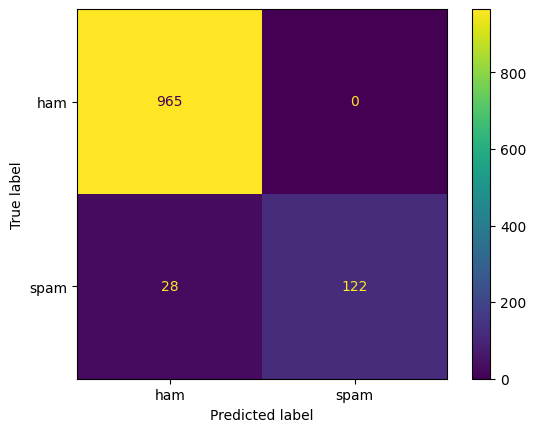

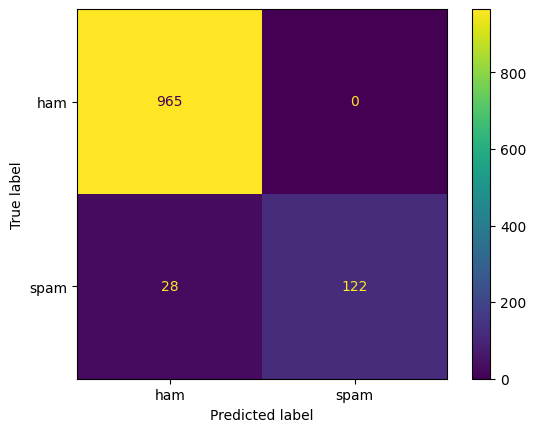

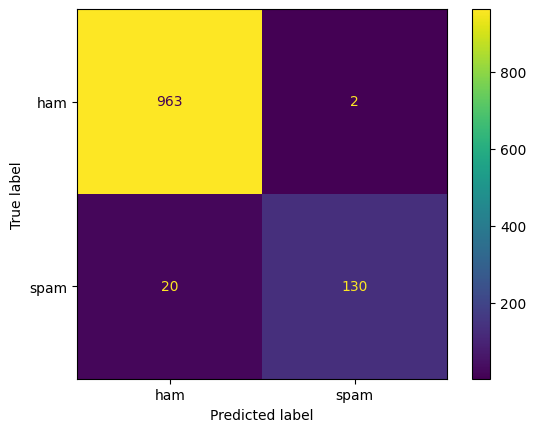

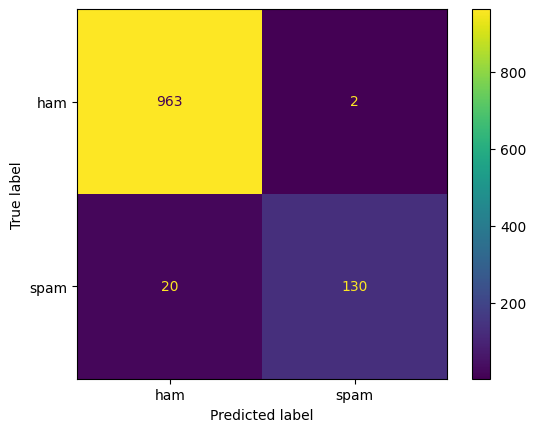

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_conf_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
nb_predictions = nb_model.predict(X_test_tfidf)
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")
print(classification_report(y_test, nb_predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, nb_predictions)
disp.plot()
svm_predictions = svm_model.predict(X_test_tfidf)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(classification_report(y_test, svm_predictions))
disp = ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions)
disp.plot()

In [31]:
!pip install graphviz

In [33]:
from graphviz import Digraph
def create_flowchart():
    dot = Digraph()
    dot.node('A', 'Load Dataset')
    dot.node('B', 'Data Preprocessing')
    dot.node('C', 'Text Lowercasing')
    dot.node('D', 'Remove Punctuation')
    dot.node('E', 'Remove Stopwords')
    dot.node('F', 'Feature Extraction (TF-IDF)')
    dot.node('G', 'Split Data into Train/Test')
    dot.node('H1', 'Train Naive Bayes')
    dot.node('H2', 'Train SVM')
    dot.node('I', 'Evaluate Models')
    dot.node('J1', 'Naive Bayes Confusion Matrix')
    dot.node('J2', 'SVM Confusion Matrix')
    dot.edge('A', 'B')
    dot.edge('B', 'C')
    dot.edge('B', 'D')
    dot.edge('B', 'E')
    dot.edge('B', 'F')
    dot.edge('F', 'G')
    dot.edge('G', 'H1')
    dot.edge('G', 'H2')
    dot.edge('H1', 'I')
    dot.edge('H2', 'I')
    dot.edge('I', 'J1')
    dot.edge('I', 'J2')
    dot.render('email_spam_flowchart', format='png', cleanup=False)
    dot.view()
create_flowchart()
